# Gemma 3 - 12B - Evaluation

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

sys.path.append(r"C:\Users\janbe\Documents\GitHub Repos\pulse")
from src.eval.llm_analyzer import LLMAnalyzer

In [2]:
base_output_dir = r"C:\Users\janbe\Documents\GitHub Repos\pulse\output_to_keep\results_benchmark\llms\gemma3"
prompt_approaches = os.listdir(base_output_dir)

Processing sarvari_2024_aggregation_preprocessor...
Model Name: Gemma3, Task: aki, Dataset: eicu, Timestamp: 20250623_045848
Model Name: Gemma3, Task: aki, Dataset: hirid, Timestamp: 20250623_045848
Model Name: Gemma3, Task: aki, Dataset: miiv, Timestamp: 20250623_045848
Model Name: Gemma3, Task: mortality, Dataset: eicu, Timestamp: 20250623_045848
Model Name: Gemma3, Task: mortality, Dataset: hirid, Timestamp: 20250623_045848
Model Name: Gemma3, Task: mortality, Dataset: miiv, Timestamp: 20250623_045848
Model Name: Gemma3, Task: sepsis, Dataset: eicu, Timestamp: 20250624_092106
Model Name: Gemma3, Task: sepsis, Dataset: hirid, Timestamp: 20250624_092106
Model Name: Gemma3, Task: sepsis, Dataset: miiv, Timestamp: 20250624_092106
Preparing data for Gemma3 PULSE score calculation...
DATA VERIFICATION FOR PULSE SCORE
Model Type: LLM
✓ Required columns present: True
✓ Target Label is binary: True
✓ Predicted Diagnosis is binary: True
✓ Predicted Probability in [0,1]: True
⚠️  Invalid predi

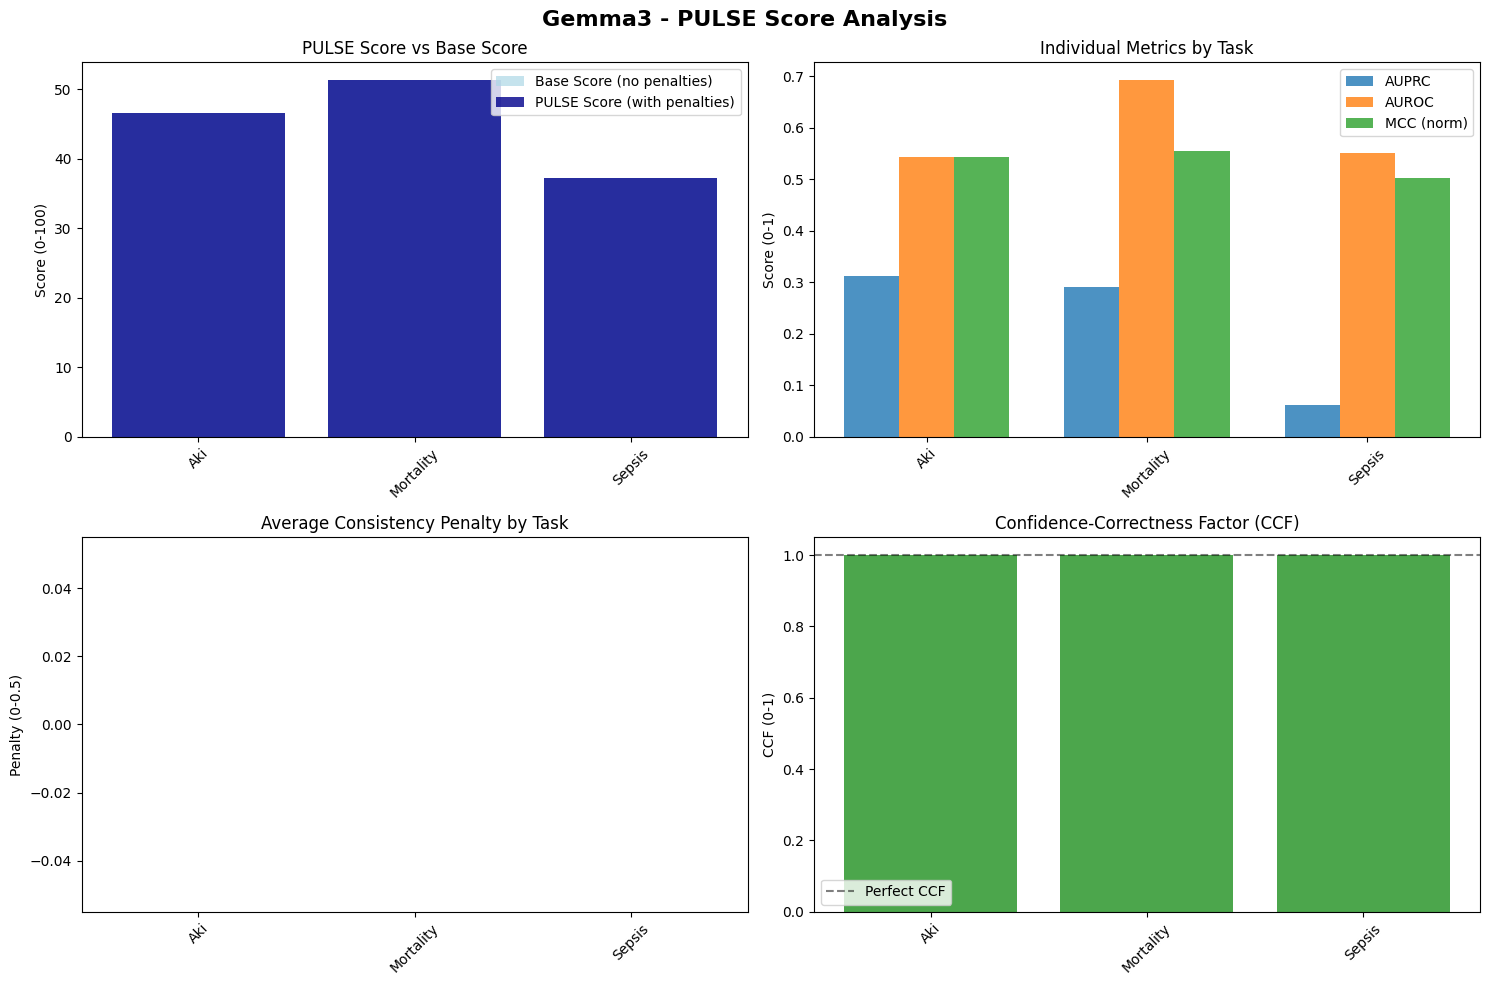

🔍 KEY INSIGHTS - PULSE SCORE ANALYSIS
🎯 FINAL PULSE SCORE: 45.07/100
📈 Performance Category: Moderate performance with confidence issues

📊 AKI Analysis:
   • Base performance: 46.7/100
   • Final PULSE score: 46.7/100
   • Penalty impact: -0.0 points
   • Problematic predictions: 0 (inconsistent or invalid)

📊 MORTALITY Analysis:
   • Base performance: 51.3/100
   • Final PULSE score: 51.3/100
   • Penalty impact: -0.0 points
   • Problematic predictions: 0 (inconsistent or invalid)

📊 SEPSIS Analysis:
   • Base performance: 37.2/100
   • Final PULSE score: 37.2/100
   • Penalty impact: -0.0 points
   • Problematic predictions: 0 (inconsistent or invalid)

⚠️  PREDICTION QUALITY:
   • Average penalty impact: -0.0 points per task
   • This indicates minimal issues with prediction quality
   • Issues include: confidence-prediction inconsistency & invalid task understanding

🔬 CLINICAL IMPACT:
   • Sepsis prediction: 37.2/100
   • Mortality prediction: 51.3/100
   • Aki prediction: 46.7/

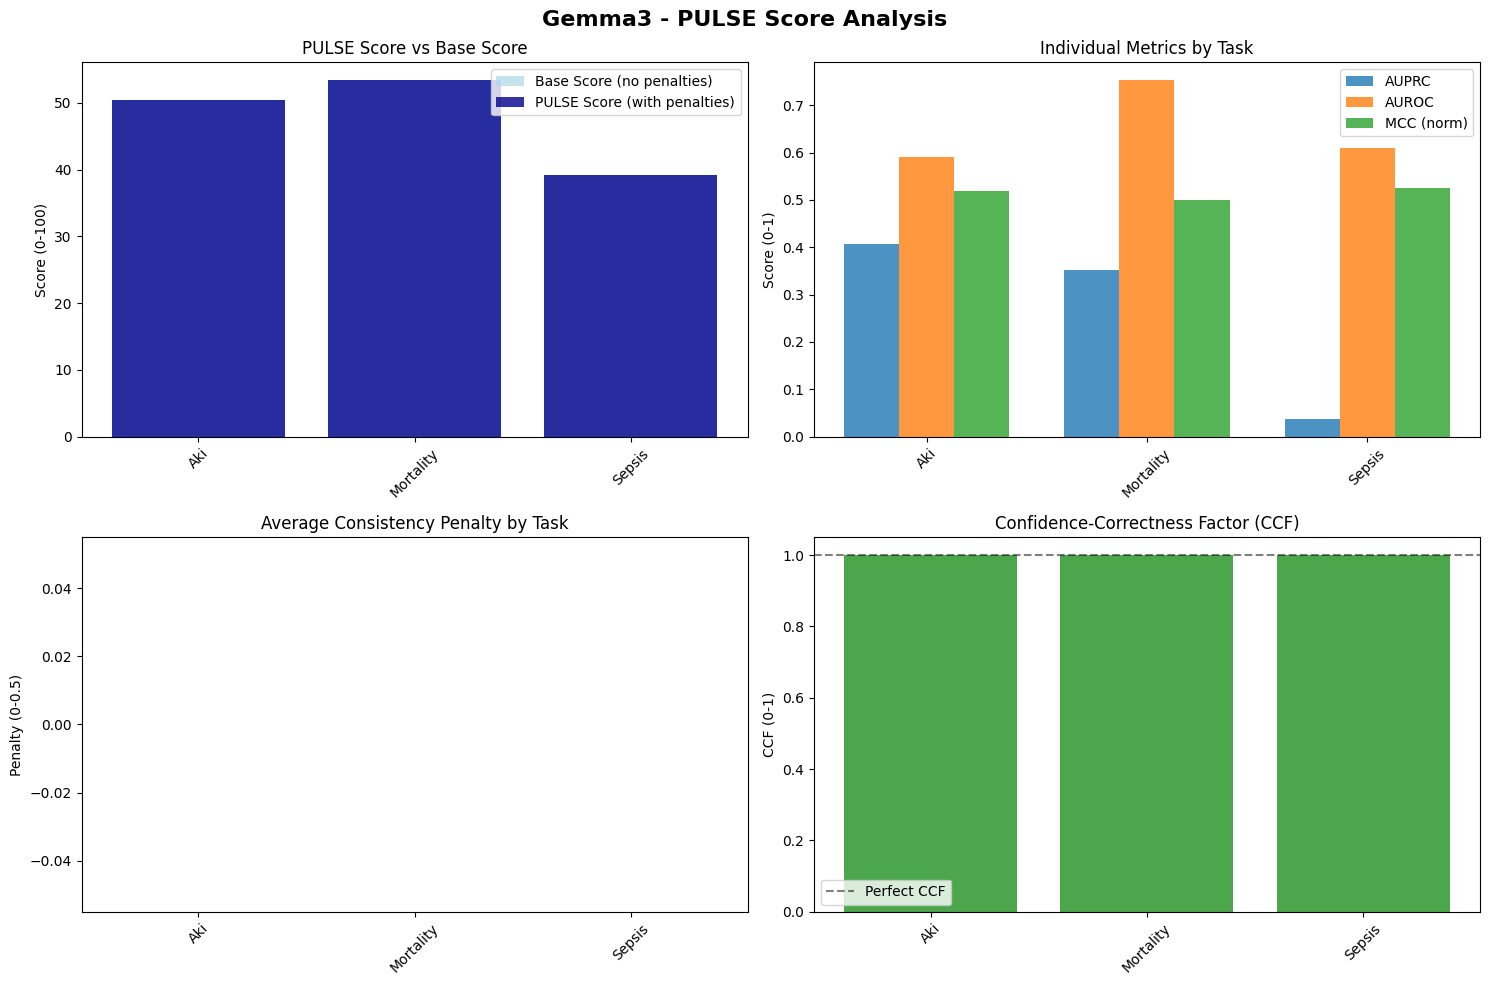

🔍 KEY INSIGHTS - PULSE SCORE ANALYSIS
🎯 FINAL PULSE SCORE: 47.70/100
📈 Performance Category: Moderate performance with confidence issues

📊 AKI Analysis:
   • Base performance: 50.5/100
   • Final PULSE score: 50.5/100
   • Penalty impact: -0.0 points
   • Problematic predictions: 0 (inconsistent or invalid)

📊 MORTALITY Analysis:
   • Base performance: 53.4/100
   • Final PULSE score: 53.4/100
   • Penalty impact: -0.0 points
   • Problematic predictions: 0 (inconsistent or invalid)

📊 SEPSIS Analysis:
   • Base performance: 39.2/100
   • Final PULSE score: 39.2/100
   • Penalty impact: -0.0 points
   • Problematic predictions: 0 (inconsistent or invalid)

⚠️  PREDICTION QUALITY:
   • Average penalty impact: -0.0 points per task
   • This indicates minimal issues with prediction quality
   • Issues include: confidence-prediction inconsistency & invalid task understanding

🔬 CLINICAL IMPACT:
   • Sepsis prediction: 39.2/100
   • Mortality prediction: 53.4/100
   • Aki prediction: 50.5/

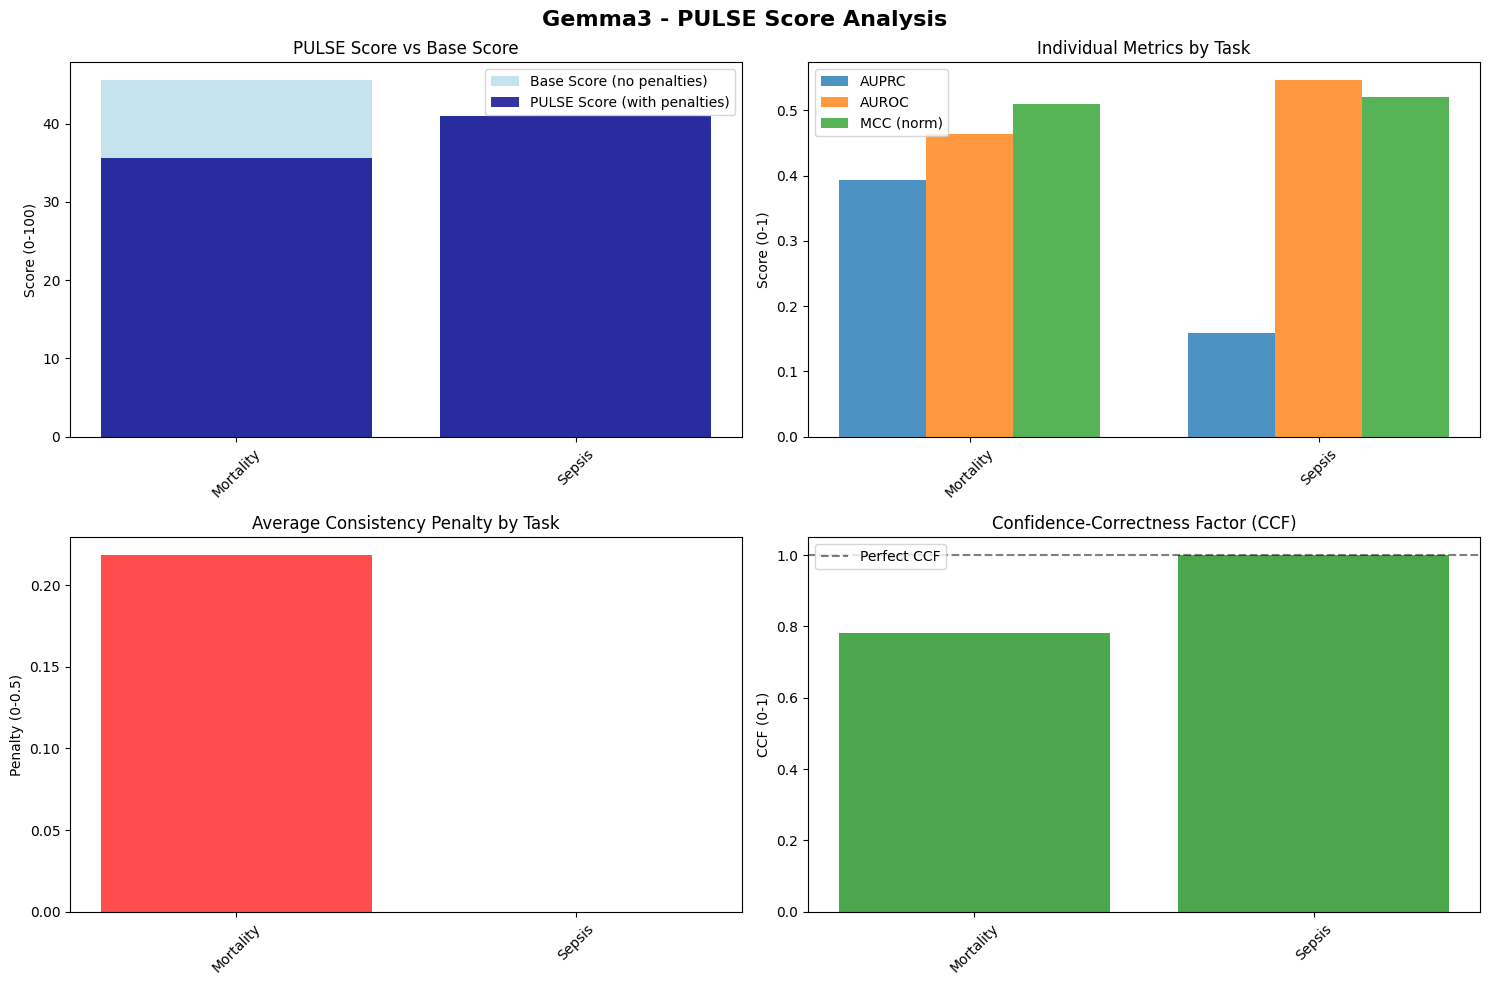

🔍 KEY INSIGHTS - PULSE SCORE ANALYSIS
🎯 FINAL PULSE SCORE: 38.30/100
📈 Performance Category: Poor performance with significant confidence problems

📊 MORTALITY Analysis:
   • Base performance: 45.6/100
   • Final PULSE score: 35.6/100
   • Penalty impact: -10.0 points
   • Problematic predictions: 205 (inconsistent or invalid)

📊 SEPSIS Analysis:
   • Base performance: 41.0/100
   • Final PULSE score: 41.0/100
   • Penalty impact: -0.0 points
   • Problematic predictions: 0 (inconsistent or invalid)

⚠️  PREDICTION QUALITY:
   • Average penalty impact: -5.0 points per task
   • This indicates minimal issues with prediction quality
   • Issues include: confidence-prediction inconsistency & invalid task understanding

🔬 CLINICAL IMPACT:
   • Sepsis prediction: 41.0/100
   • Mortality prediction: 35.6/100
   • Aki prediction: 0.0/100
Best prompt approach: zhu_2024b_zero_shot_preprocessor with PULSE score: 47.69877733811831


In [3]:
from src.eval.pulse_score import PULSEScoreCalculator

best_prompt_approach = None

for prompt_approach in prompt_approaches:
    if not os.path.isdir(os.path.join(base_output_dir, prompt_approach)):
        continue
    print(f"Processing {prompt_approach}...")
    cat_files = LLMAnalyzer.categorize_files(
        [os.path.join(base_output_dir, prompt_approach)],
        verbose=False,
    )
    df_mdata = LLMAnalyzer.load_metadata(cat_files["metadata_files"])
    ps = PULSEScoreCalculator()
    pulse_score = ps.calculate_pulse_score_from_raw_data(
        df=df_mdata,
    )
    pulse_score = pulse_score["overall"]["pulse_score"]

    if best_prompt_approach is None or pulse_score > best_prompt_approach[1]:
        best_prompt_approach = (prompt_approach, pulse_score)

print(
    f"Best prompt approach: {best_prompt_approach[0]} with PULSE score: {best_prompt_approach[1]}"
)

## Model Metrics

In [4]:
df_results = LLMAnalyzer.load_metrics_from_prompt_approaches(base_output_dir, prompt_approaches)

C:\Users\janbe\Documents\GitHub Repos\pulse\src\eval\llm_analyzer.py:719: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = plot_df.groupby(["Group", "Metric"], as_index=False).agg(


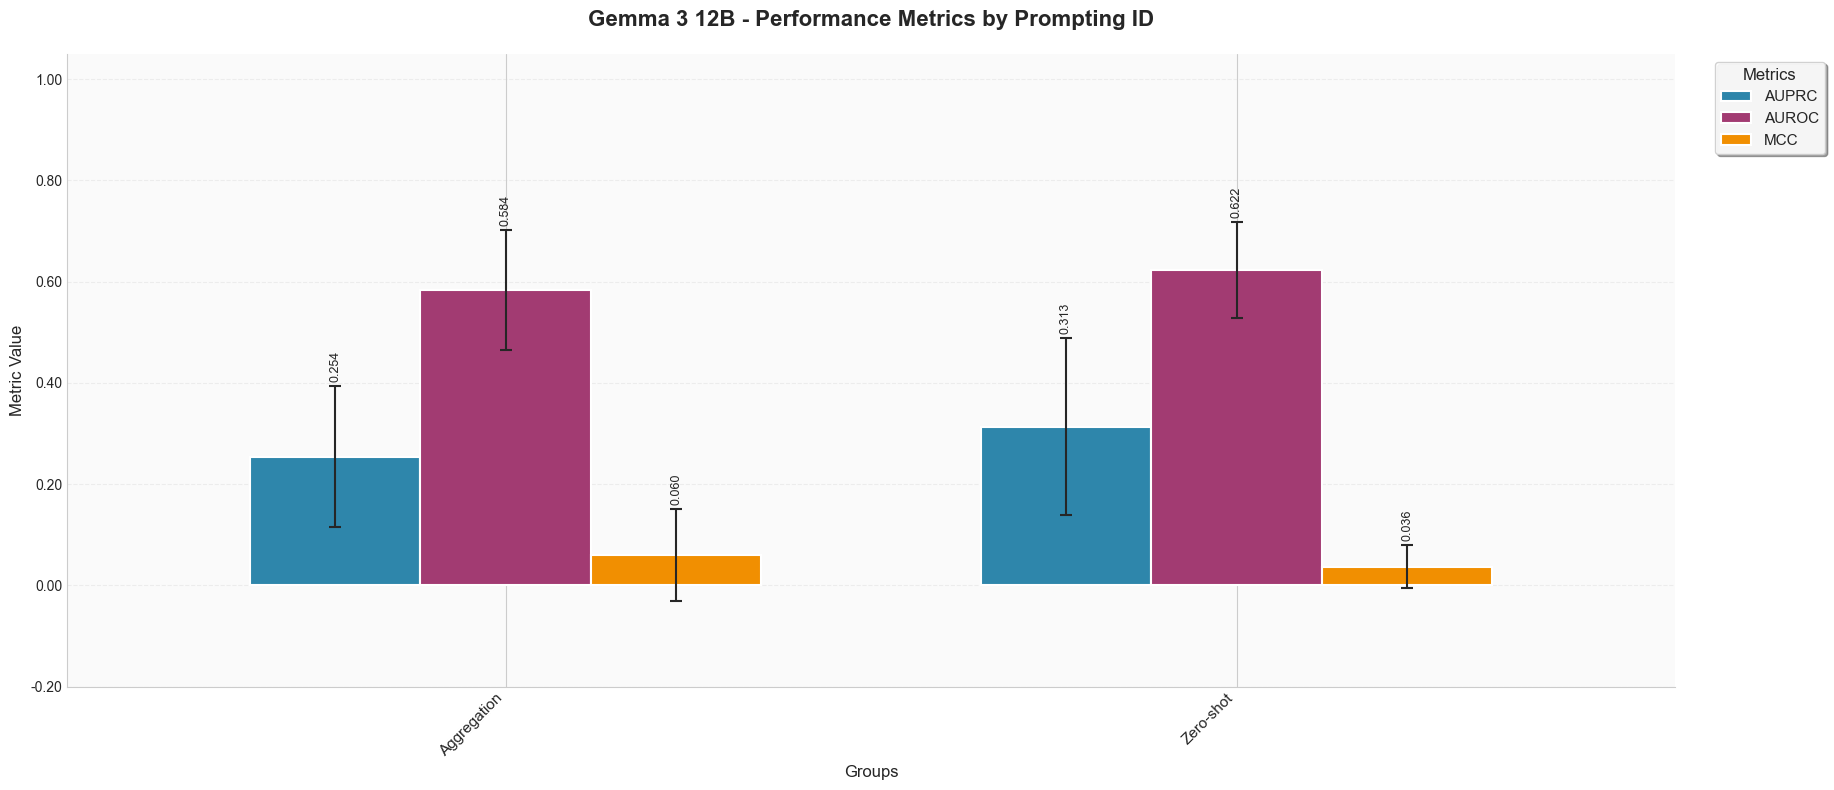

In [5]:
LLMAnalyzer.plot_metrics(
    df_results, group=["prompting_id"], title_prefix="Gemma 3 12B - ",
)

C:\Users\janbe\Documents\GitHub Repos\pulse\src\eval\llm_analyzer.py:719: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = plot_df.groupby(["Group", "Metric"], as_index=False).agg(


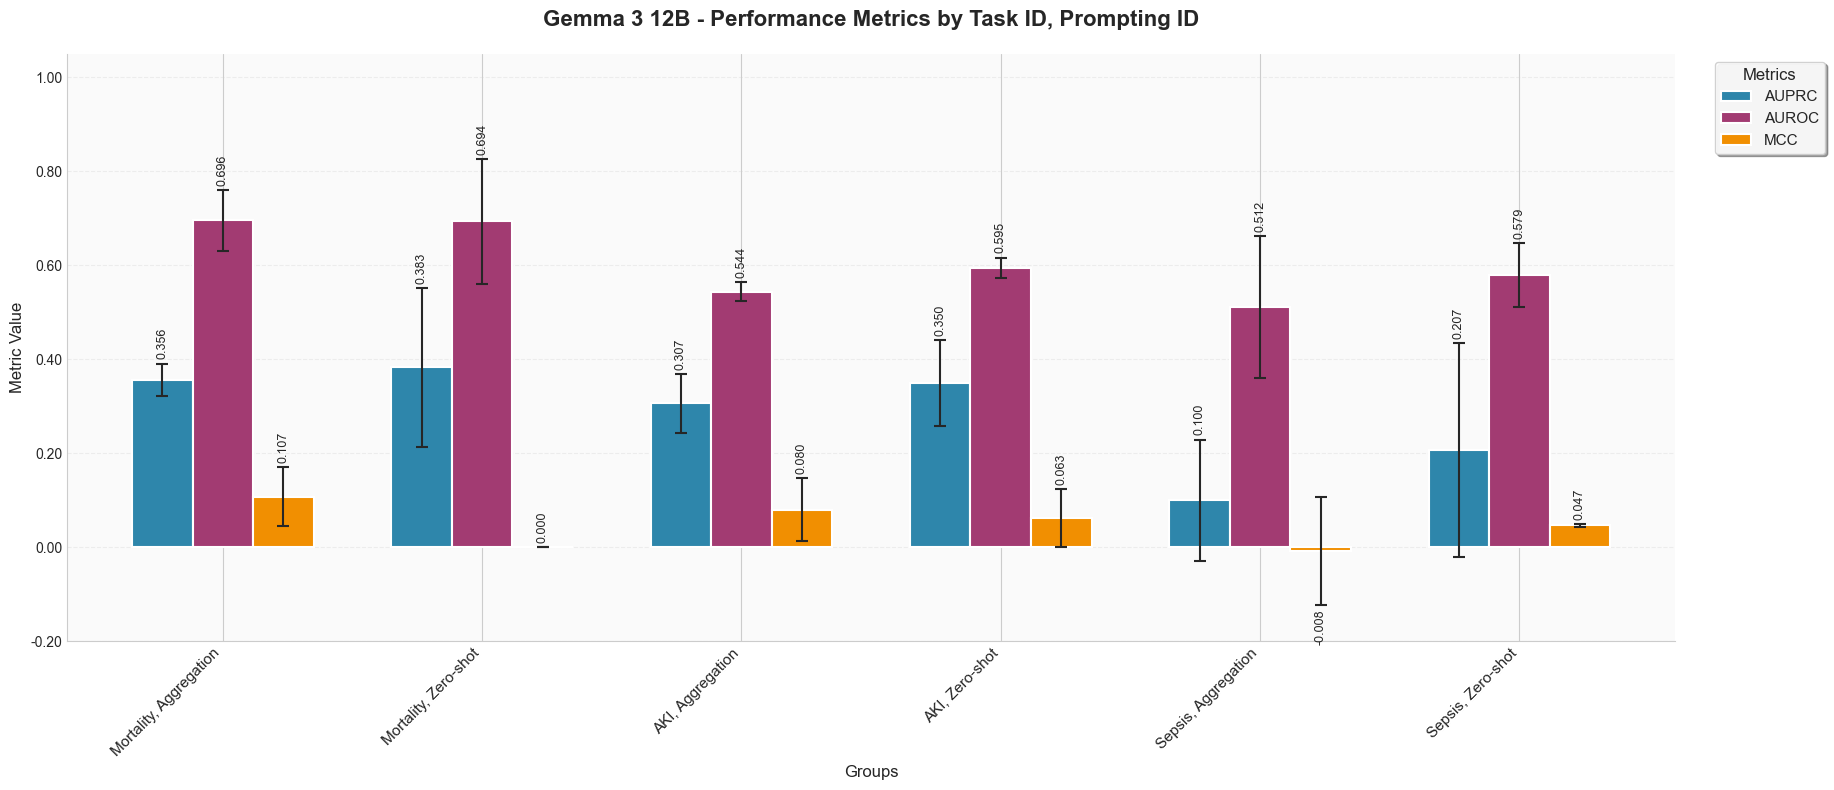

In [6]:
LLMAnalyzer.plot_metrics(
    df_results,
    group=["task_id", "prompting_id"],
    title_prefix="Gemma 3 12B - ",
)

In [7]:
import ipywidgets as widgets
from IPython.display import display

Analysis of best prompting approach

In [13]:
prompt_dropdown = widgets.Dropdown(
    options=prompt_approaches,
    value=best_prompt_approach[0],
    description='Prompt Approach:',
    style={'description_width': 'initial'}
)
display(prompt_dropdown)


Dropdown(description='Prompt Approach:', index=1, options=('sarvari_2024_aggregation_preprocessor', 'zhu_2024b…

In [14]:
best_approach_path = os.path.join(
    base_output_dir, prompt_dropdown.value
)
print(f"Loading metadata from: {best_approach_path}")
print("======================================================")
cat_files = LLMAnalyzer.categorize_files([best_approach_path], verbose=False)
df_mdata = LLMAnalyzer.load_metadata(cat_files["metadata_files"])

Loading metadata from: C:\Users\janbe\Documents\GitHub Repos\pulse\output_to_keep\results_benchmark\llms\gemma3\zhu_2024b_zero_shot_preprocessor


Model Name: Gemma3, Task: aki, Dataset: eicu, Timestamp: 20250624_200322
Model Name: Gemma3, Task: aki, Dataset: hirid, Timestamp: 20250624_200322
Model Name: Gemma3, Task: aki, Dataset: miiv, Timestamp: 20250624_200322
Model Name: Gemma3, Task: mortality, Dataset: eicu, Timestamp: 20250624_200322
Model Name: Gemma3, Task: mortality, Dataset: hirid, Timestamp: 20250624_200322
Model Name: Gemma3, Task: mortality, Dataset: miiv, Timestamp: 20250624_200322
Model Name: Gemma3, Task: sepsis, Dataset: eicu, Timestamp: 20250624_200322
Model Name: Gemma3, Task: sepsis, Dataset: hirid, Timestamp: 20250624_200322
Model Name: Gemma3, Task: sepsis, Dataset: miiv, Timestamp: 20250626_165736


In [15]:
LLMAnalyzer.print_approach_summary(df_mdata)

,task,dataset,mean_inference_time,total_inference_time,mean_input_tokens,total_input_tokens,mean_output_tokens,total_output_tokens,positive_samples,negative_samples,total_samples,pos_neg_ratio
0,aki,eicu,25.16s,24757.18s,3967,3903134,300,295200,305,679,984,0.45
1,aki,hirid,25.56s,25099.60s,3974,3902883,300,294600,159,823,982,0.19
2,aki,miiv,25.87s,25452.85s,3970,3906370,300,295200,229,755,984,0.30
3,mortality,eicu,29.13s,2912.84s,10269,1026936,300,30000,7,93,100,0.08
4,mortality,hirid,28.89s,2888.87s,10304,1030443,300,30000,11,89,100,0.12
5,mortality,miiv,29.15s,2914.98s,10278,1027844,300,30000,12,88,100,0.14
6,sepsis,eicu,26.12s,25599.66s,3995,3915502,300,294000,47,933,980,0.05
7,sepsis,hirid,25.73s,24930.80s,4005,3880953,300,290700,73,896,969,0.08
8,sepsis,miiv,25.17s,24914.74s,3997,3957398,300,297000,25,965,990,0.03


In [16]:
metrics_report = cat_files['metrics_report_files'][0]
df_metrics = pd.read_json(metrics_report)
df_metrics

,model_id,task_id,dataset,prompting_id,run_id,metrics_summary
0,Gemma3,mortality,eicu,zhu_2024b_zero_shot_preprocessor,20250624200322,"{'overall': {'auroc': 0.78, 'auprc': 0.1730000..."
1,Gemma3,mortality,hirid,zhu_2024b_zero_shot_preprocessor,20250624200322,"{'overall': {'auroc': 0.6990000000000001, 'aup..."
2,Gemma3,mortality,miiv,zhu_2024b_zero_shot_preprocessor,20250624200322,"{'overall': {'auroc': 0.79, 'auprc': 0.504, 'n..."
3,Gemma3,aki,eicu,zhu_2024b_zero_shot_preprocessor,20250624200322,"{'overall': {'auroc': 0.615, 'auprc': 0.277, '..."
4,Gemma3,aki,hirid,zhu_2024b_zero_shot_preprocessor,20250624200322,"{'overall': {'auroc': 0.586, 'auprc': 0.374, '..."
5,Gemma3,aki,miiv,zhu_2024b_zero_shot_preprocessor,20250624200322,"{'overall': {'auroc': 0.5690000000000001, 'aup..."
6,Gemma3,sepsis,eicu,zhu_2024b_zero_shot_preprocessor,20250624200322,"{'overall': {'auroc': 0.61, 'auprc': 0.038, 'n..."
7,Gemma3,sepsis,hirid,zhu_2024b_zero_shot_preprocessor,20250624200322,"{'overall': {'auroc': 0.618, 'auprc': 0.517, '..."
8,Gemma3,sepsis,miiv,zhu_2024b_zero_shot_preprocessor,20250626165736,"{'overall': {'auroc': 0.47700000000000004, 'au..."


In [17]:
# Save metrics to results.json using the LLMAnalyzer method
added_count, updated_count = LLMAnalyzer.save_metrics_to_results_json(
    metrics_report_path=metrics_report,
    results_json_path="../docs/results.json"
)

Updating existing record: model_id='Gemma3', prompting_id='zhu_2024b_zero_shot_preprocessor', task_id='mortality', dataset='eicu', run_id='20250624_200322'
Updating existing record: model_id='Gemma3', prompting_id='zhu_2024b_zero_shot_preprocessor', task_id='mortality', dataset='hirid', run_id='20250624_200322'
Updating existing record: model_id='Gemma3', prompting_id='zhu_2024b_zero_shot_preprocessor', task_id='mortality', dataset='miiv', run_id='20250624_200322'
Updating existing record: model_id='Gemma3', prompting_id='zhu_2024b_zero_shot_preprocessor', task_id='aki', dataset='eicu', run_id='20250624_200322'
Updating existing record: model_id='Gemma3', prompting_id='zhu_2024b_zero_shot_preprocessor', task_id='aki', dataset='hirid', run_id='20250624_200322'
Updating existing record: model_id='Gemma3', prompting_id='zhu_2024b_zero_shot_preprocessor', task_id='aki', dataset='miiv', run_id='20250624_200322'
Updating existing record: model_id='Gemma3', prompting_id='zhu_2024b_zero_shot_p